<a href="https://colab.research.google.com/github/veldahung/ML_JohnlCHull/blob/main/Salary_and_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Imports
!wget "https://github.com/YI-CHENG-SHIH645/ML-in-Business_practice/raw/master/utils.py"

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from utils import display_side_by_side, DataLoader

np.random.seed(3)

--2023-08-11 05:22:57--  https://github.com/YI-CHENG-SHIH645/ML-in-Business_practice/raw/master/utils.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/YI-CHENG-SHIH645/ML_Intro/raw/master/utils.py [following]
--2023-08-11 05:22:57--  https://github.com/YI-CHENG-SHIH645/ML_Intro/raw/master/utils.py
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/YI-CHENG-SHIH645/ML_Intro/master/utils.py [following]
--2023-08-11 05:22:57--  https://raw.githubusercontent.com/YI-CHENG-SHIH645/ML_Intro/master/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request se

# Regularization


In [ ]:
#@title load salary and wage unscaled data
age=[25,55,27,35,60,65,45,40,50,30]
age2=[625,3025,729,1225,3600,4225,2025,1600,2500,900]
age3=[15625,166375,19683,42875,216000,274625,91125,64000,125000,27000]
age4=[390625,9150625,531441,1500625,12960000,17850625,4100625,2560000,6250000,810000]
age5=[9765625,503284375,14348907,52521875,777600000,1160290625,184528125,102400000,312500000,24300000]
salary=[135,260,105,220,240,265,270,300,265,105]
age_s=[-1.28994774,0.836339743,-1.148195241,-0.581185245,1.19072099,1.545102237,0.127577249,-0.226803998,0.481958496,-0.935566492]
age2_s=[-1.128108995,0.778017158,-1.045510195,-0.651577457,1.234693215,1.731080234,-0.016202072,-0.353745245,0.361052062,-0.909698706]
age3_s=[-0.988322256,0.693165639,-0.943058721,-0.684371708,1.246690261,1.90060222,-0.14618404,-0.44874032,0.231662742,-0.861443816]
age4_s=[-0.873562079,0.592462958,-0.849995894,-0.687798633,1.22997884,2.048446728,-0.252677047,-0.510507506,0.107030438,-0.803377804]
age5_s=[-0.78212809,0.485972036,-0.770351312,-0.672265585,1.190828089,2.174154517,-0.333074537,-0.544103369,-0.004249845,-0.744781904]
salary_s=[-1.110188697,0.592554703,-1.518847113,0.047676815,0.320115759,0.660664439,0.728774175,1.137432591,0.660664439,-1.518847113]
d = {"salary":salary,"age":age,"age^2":age2,"age^3":age3,"age^4":age4,"age^5":age5}
original_df = pd.DataFrame(data=d)
ds = {"salary":salary,"age":age_s,"age^2":age2_s,"age^3":age3_s,"age^4":age4_s,"age^5":age5_s}
scaled_df = pd.DataFrame(data=ds)
dsals = {"salary":salary_s,"age":age_s,"age^2":age2_s,"age^3":age3_s,"age^4":age4_s,"age^5":age5_s}
scaledsal_df = pd.DataFrame(data=dsals)
display(original_df)
display(scaled_df)
display(scaledsal_df)

,salary,age,age^2,age^3,age^4,age^5
0,135,25,625,15625,390625,9765625
1,260,55,3025,166375,9150625,503284375
2,105,27,729,19683,531441,14348907
3,220,35,1225,42875,1500625,52521875
4,240,60,3600,216000,12960000,777600000
5,265,65,4225,274625,17850625,1160290625
6,270,45,2025,91125,4100625,184528125
7,300,40,1600,64000,2560000,102400000
8,265,50,2500,125000,6250000,312500000
9,105,30,900,27000,810000,24300000


,salary,age,age^2,age^3,age^4,age^5
0,135,-1.289948,-1.128109,-0.988322,-0.873562,-0.782128
1,260,0.836340,0.778017,0.693166,0.592463,0.485972
2,105,-1.148195,-1.045510,-0.943059,-0.849996,-0.770351
3,220,-0.581185,-0.651577,-0.684372,-0.687799,-0.672266
4,240,1.190721,1.234693,1.246690,1.229979,1.190828
5,265,1.545102,1.731080,1.900602,2.048447,2.174155
6,270,0.127577,-0.016202,-0.146184,-0.252677,-0.333075
7,300,-0.226804,-0.353745,-0.448740,-0.510508,-0.544103
8,265,0.481958,0.361052,0.231663,0.107030,-0.004250
9,105,-0.935566,-0.909699,-0.861444,-0.803378,-0.744782


,salary,age,age^2,age^3,age^4,age^5
0,-1.110189,-1.289948,-1.128109,-0.988322,-0.873562,-0.782128
1,0.592555,0.836340,0.778017,0.693166,0.592463,0.485972
2,-1.518847,-1.148195,-1.045510,-0.943059,-0.849996,-0.770351
3,0.047677,-0.581185,-0.651577,-0.684372,-0.687799,-0.672266
4,0.320116,1.190721,1.234693,1.246690,1.229979,1.190828
5,0.660664,1.545102,1.731080,1.900602,2.048447,2.174155
6,0.728774,0.127577,-0.016202,-0.146184,-0.252677,-0.333075
7,1.137433,-0.226804,-0.353745,-0.448740,-0.510508,-0.544103
8,0.660664,0.481958,0.361052,0.231663,0.107030,-0.004250
9,-1.518847,-0.935566,-0.909699,-0.861444,-0.803378,-0.744782


In [ ]:
train = original_df
train_s = scaled_df
train_sal = scaledsal_df

In [ ]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train = train.drop('salary', axis=1)
y_train = train[['salary']]

X_train_s = train_s.drop('salary', axis=1)
y_train_s = train_s[['salary']]

X_train_sal = train_sal.drop('salary', axis=1)
y_train_sal = train_sal[['salary']]


## Linear Regression

John C Hull :

linear model :
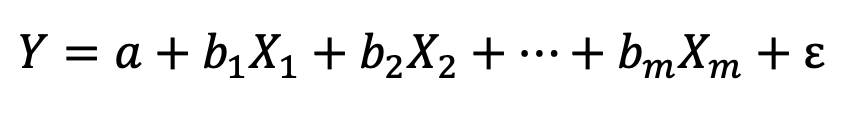
minimize :
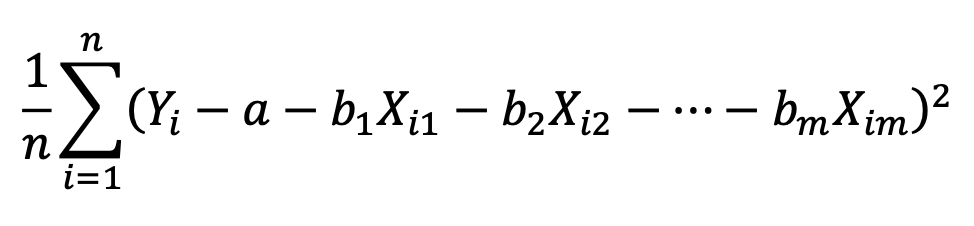



sklearn :


linear model :

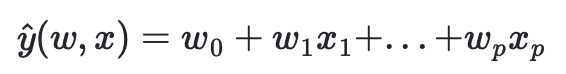

minimize :

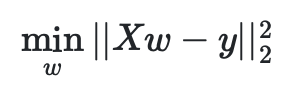


In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
#unscaled
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_t=lr.predict(X_train)
print(mse(y_train,pred_t))

149.82015905798903


In [ ]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
display(coeffs)

coef=np.flip(lr.coef_[0])
poly=np.append(coef,lr.intercept_)
poly_unscaled=np.poly1d(poly)
print(poly_unscaled)

#a=sorted(age)
#print(a)
#plt.plot(a,poly_unscaled(a))

,1
0,
intercept,19198.420864
age,-2312.165579
age^2,107.539453
age^3,-2.403642
age^4,0.025993
age^5,-0.000109


            5           4         3         2
-0.0001094 x + 0.02599 x - 2.404 x + 107.5 x - 2312 x + 1.92e+04


In [ ]:
#scaled
lrs=LinearRegression()
lrs.fit(X_train_s,y_train_s)
pred_t_s=lrs.predict(X_train_s)
print(mse(y_train_s,pred_t_s))

149.81999220195823


In [ ]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lrs.intercept_) + list(lrs.coef_[0])
    ]
).transpose().set_index(0)
display(coeffs)

coef=np.flip(lrs.coef_[0])
poly=np.append(coef,lrs.intercept_)
poly_scaled=np.poly1d(poly)
print(poly_scaled)


,1
0,
intercept,216.500016
age,-32622.580742
age^2,135402.77342
age^3,-215493.198539
age^4,155314.682358
age^5,-42558.783974


            5             4             3             2
-4.256e+04 x + 1.553e+05 x - 2.155e+05 x + 1.354e+05 x - 3.262e+04 x + 216.5


In [ ]:
#scaled salary
lrsal=LinearRegression()
lrsal.fit(X_train_sal,y_train_sal)
pred_t_s=lrsal.predict(X_train_sal)
print(mse(y_train_sal,pred_t_s))

0.02780021504076317


In [ ]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lrsal.intercept_) + list(lrsal.coef_[0])
    ]
).transpose().set_index(0)
display(coeffs)

coef=np.flip(lrs.coef_[0])
poly=np.append(coef,lrsal.intercept_)
poly_scaled=np.poly1d(poly)
print(poly_scaled)


,1
0,
intercept,0.0
age,-444.383072
age^2,1844.44943
age^3,-2935.436972
age^4,2115.688402
age^5,-579.733508


            5             4             3             2
-4.256e+04 x + 1.553e+05 x - 2.155e+05 x + 1.354e+05 x - 3.262e+04 x + 2.218e-07


##Ridge


John C Hull :
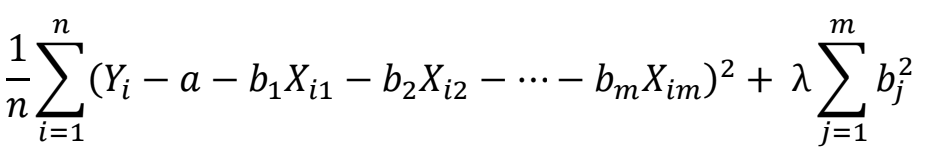


sklearn :

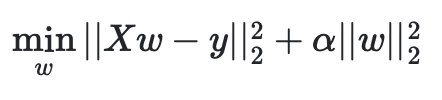

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
#unscaled
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0, 0.02*10, 0.1*10, 1*10]
mset=[]
coefs = []
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred_t=ridge.predict(X_train)
    mset.append(mse(y_train,pred_t))
    coefs.append(ridge.coef_)
    coeffs = pd.DataFrame(
      [
          ['intercept'] + list(X_train.columns),
          list(ridge.intercept_) + list(ridge.coef_[0])
      ]
    ).transpose().set_index(0)
    display(coeffs)
    coef=np.flip(ridge.coef_[0])
    poly=np.append(coef,ridge.intercept_)
    poly_unscaled=np.poly1d(poly)
    print(poly_unscaled)



lambdas=[0,0.02, 0.1,1]

dr = {"training": mset}
dfr = pd.DataFrame(data=dr, index=lambdas)
display(dfr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.18236e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,1
0,
intercept,19198.421254
age,-2312.165626
age^2,107.539455
age^3,-2.403642
age^4,0.025993
age^5,-0.000109


            5           4         3         2
-0.0001094 x + 0.02599 x - 2.404 x + 107.5 x - 2312 x + 1.92e+04


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38568e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,1
0,
intercept,534.099925
age,-8.801656
age^2,-2.800879
age^3,0.164174
age^4,-0.003088
age^5,0.000019


           5            4          3         2
1.912e-05 x - 0.003088 x + 0.1642 x - 2.801 x - 8.802 x + 534.1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.90964e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,1
0,
intercept,474.617968
age,-1.88792
age^2,-3.111663
age^3,0.170949
age^4,-0.00316
age^5,0.000019


           5           4          3         2
1.942e-05 x - 0.00316 x + 0.1709 x - 3.112 x - 1.888 x + 474.6


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.92581e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,1
0,
intercept,425.759871
age,-0.316628
age^2,-2.973786
age^3,0.162961
age^4,-0.003019
age^5,0.000019


           5            4         3         2
1.859e-05 x - 0.003019 x + 0.163 x - 2.974 x - 0.3166 x + 425.8


,training
0.00,149.820159
0.02,549.099051
0.10,551.507102
1.00,552.755622


In [ ]:
#scaled
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[ 0,0.02*10, 0.1*10,1*10]
mset=[]
coefs = []
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train_s,y_train_s)
    ridge.fit(X_train_s,y_train_s)
    pred_t=ridge.predict(X_train_s)
    mset.append(mse(y_train_s,pred_t))
    coefs.append(ridge.coef_)
    coeffs = pd.DataFrame(
      [
          ['intercept'] + list(X_train.columns),
          list(ridge.intercept_) + list(ridge.coef_[0])
      ]
    ).transpose().set_index(0)
    display(coeffs)
    coef=np.flip(ridge.coef_[0])
    poly=np.append(coef,ridge.intercept_)
    poly_scaled=np.poly1d(poly)
    print(poly_scaled)



lambdas=[0, 0.02, 0.1,1]

dr = {"training": mset}
dfr = pd.DataFrame(data=dr, index=lambdas)
display(dfr)

,1
0,
intercept,216.500016
age,-32622.580328
age^2,135402.77164
age^3,-215493.195575
age^4,155314.68011
age^5,-42558.783325


            5             4             3             2
-4.256e+04 x + 1.553e+05 x - 2.155e+05 x + 1.354e+05 x - 3.262e+04 x + 216.5


,1
0,
intercept,216.5
age,97.765665
age^2,36.626479
age^3,-8.532968
age^4,-35.022915
age^5,-44.606649


        5         4         3         2
-44.61 x - 35.02 x - 8.533 x + 36.63 x + 97.77 x + 216.5


,1
0,
intercept,216.5
age,56.493472
age^2,28.071841
age^3,3.716815
age^4,-15.090651
age^5,-28.3578


        5         4         3         2
-28.36 x - 15.09 x + 3.717 x + 28.07 x + 56.49 x + 216.5


,1
0,
intercept,216.5
age,15.637739
age^2,10.990832
age^3,6.763111
age^4,3.236314
age^5,0.475396


        5         4         3         2
0.4754 x + 3.236 x + 6.763 x + 10.99 x + 15.64 x + 216.5


,training
0.00,149.819992
0.02,1217.783172
0.10,1664.077773
1.00,2784.128827


In [ ]:
#scaled
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0, 0.02*10, 0.1*10,1*10]
mset=[]
coefs = []
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train_sal,y_train_sal)
    ridge.fit(X_train_sal,y_train_sal)
    pred_t=ridge.predict(X_train_sal)
    mset.append(mse(y_train_sal,pred_t))
    coefs.append(ridge.coef_)
    coeffs = pd.DataFrame(
      [
          ['intercept'] + list(X_train.columns),
          list(ridge.intercept_) + list(ridge.coef_[0])
      ]
    ).transpose().set_index(0)
    display(coeffs)
    coef=np.flip(ridge.coef_[0])
    poly=np.append(coef,ridge.intercept_)
    poly_scaled=np.poly1d(poly)
    print(poly_scaled)



lambdas=[0, 0.02, 0.1,1]

dr = {"training": mset}
dfr = pd.DataFrame(data=dr, index=lambdas)
display(dfr)

,1
0,
intercept,0.0
age,-444.383067
age^2,1844.449406
age^3,-2935.436932
age^4,2115.688372
age^5,-579.733499


        5        4        3        2
-579.7 x + 2116 x - 2935 x + 1844 x - 444.4 x + 2.218e-07


,1
0,
intercept,0.0
age,1.331759
age^2,0.498924
age^3,-0.116236
age^4,-0.47708
age^5,-0.607629


         5          4          3          2
-0.6076 x - 0.4771 x - 0.1162 x + 0.4989 x + 1.332 x + 4.24e-11


,1
0,
intercept,-0.0
age,0.769551
age^2,0.382393
age^3,0.05063
age^4,-0.205564
age^5,-0.386288


         5          4           3          2
-0.3863 x - 0.2056 x + 0.05063 x + 0.3824 x + 0.7696 x - 6.931e-11


,1
0,
intercept,-0.0
age,0.213016
age^2,0.149717
age^3,0.092127
age^4,0.044085
age^5,0.006476


          5           4           3          2
0.006476 x + 0.04408 x + 0.09213 x + 0.1497 x + 0.213 x - 1.773e-10


,training
0.00,0.027800
0.02,0.225969
0.10,0.308782
1.00,0.516616


## Lasso

John C Hull :

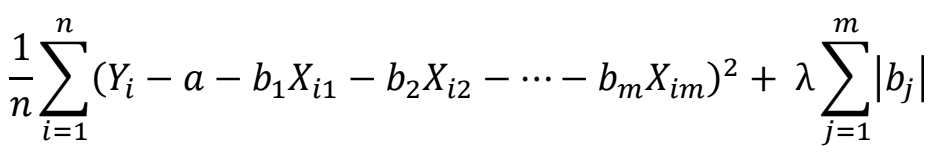


sklearn :

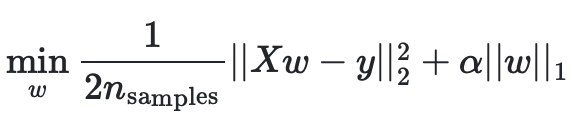

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
#unscaled
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0/2, 0.02/2, 0.1/2, 1/2]
mset=[]
coefs = []
coe=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred_t=lasso.predict(X_train)
    mset.append(mse(y_train,pred_t))
    coefs.append(lasso.coef_)
    coeffs = pd.DataFrame(
      [
          ['intercept'] + list(X_train.columns),
          list(lasso.intercept_) + list(lasso.coef_)
      ]
    ).transpose().set_index(0)
    display(coeffs)
    coef=np.flip(lasso.coef_)
    poly=np.append(coef,lasso.intercept_)
    poly_unscaled=np.poly1d(poly)
    print(poly_unscaled)

lambdas=[0, 0.02, 0.1, 1]

dl = {"training": mset}
dfl = pd.DataFrame(data=dl, index=lambdas)
display(dfl)


<ipython-input-18-e71f672006dc>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.368e+03, tolerance: 4.850e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


,1
0,
intercept,-517.814296
age,32.049919
age^2,-0.251861
age^3,-0.002155
age^4,-0.000004
age^5,0.0


           5             4            3          2
3.561e-07 x - 3.987e-06 x - 0.002155 x - 0.2519 x + 32.05 x - 517.8


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.372e+03, tolerance: 4.850e+00
  model = cd_fast.enet_coordinate_descent(


,1
0,
intercept,-517.493655
age,32.028077
age^2,-0.251427
age^3,-0.002157
age^4,-0.000004
age^5,0.0


           5             4            3          2
3.561e-07 x - 3.999e-06 x - 0.002157 x - 0.2514 x + 32.03 x - 517.5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.385e+03, tolerance: 4.850e+00
  model = cd_fast.enet_coordinate_descent(


,1
0,
intercept,-516.211092
age,31.940709
age^2,-0.249689
age^3,-0.002164
age^4,-0.000004
age^5,0.0


          5             4            3          2
3.56e-07 x - 4.047e-06 x - 0.002164 x - 0.2497 x + 31.94 x - 516.2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.531e+03, tolerance: 4.850e+00
  model = cd_fast.enet_coordinate_descent(


,1
0,
intercept,-501.782256
age,30.957817
age^2,-0.230143
age^3,-0.002247
age^4,-0.000005
age^5,0.0


           5             4            3          2
3.552e-07 x - 4.585e-06 x - 0.002247 x - 0.2301 x + 30.96 x - 501.8


,training
0.00,873.672071
0.02,873.695438
0.10,873.789912
1.00,874.963410


In [ ]:
#scaled
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0, 0.02/2, 0.1/2, 1/2]
mset=[]
coefs = []
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train_s,y_train_s)
    pred_t=lasso.predict(X_train_s)
    mset.append(mse(y_train_s,pred_t))
    coefs.append(lasso.coef_)
    coeffs = pd.DataFrame(
      [
          ['intercept'] + list(X_train.columns),
          list(lasso.intercept_) + list(lasso.coef_)
      ]
    ).transpose().set_index(0)
    display(coeffs)
    coef=np.flip(lasso.coef_)
    poly=np.append(coef,lasso.intercept_)
    poly_scaled=np.poly1d(poly)
    print(poly_scaled)


lambdas=[0, 0.02, 0.1, 1]

dl = {"training": mset}
dfl = pd.DataFrame(data=dl, index=lambdas)
display(dfl)


[ 452.19547546 -317.11758337 -193.17410696  -23.82385174  138.584635  ]


<ipython-input-19-3332923cb396>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train_s,y_train_s)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.368e+03, tolerance: 4.850e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


,1
0,
intercept,216.5
age,452.195475
age^2,-317.117583
age^3,-193.174107
age^4,-23.823852
age^5,138.584635


       5         4         3         2
138.6 x - 23.82 x - 193.2 x - 317.1 x + 452.2 x + 216.5
[ 438.20976722 -300.11024247 -192.09094224  -17.71416497  127.95843264]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+03, tolerance: 4.850e+00
  model = cd_fast.enet_coordinate_descent(


,1
0,
intercept,216.5
age,438.209767
age^2,-300.110242
age^3,-192.090942
age^4,-17.714165
age^5,127.958433


     5         4         3         2
128 x - 17.71 x - 192.1 x - 300.1 x + 438.2 x + 216.5
[ 383.74248757 -232.02245517 -188.08784091   -0.           91.06968609]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.933e+03, tolerance: 4.850e+00
  model = cd_fast.enet_coordinate_descent(


,1
0,
intercept,216.5
age,383.742488
age^2,-232.022455
age^3,-188.087841
age^4,-0.0
age^5,91.069686


       5     4         3       2
91.07 x - 0 x - 188.1 x - 232 x + 383.7 x + 216.5
[147.41983951  -0.          -0.         -99.33146659  -0.        ]


,1
0,
intercept,216.5
age,147.41984
age^2,-0.0
age^3,-0.0
age^4,-99.331467
age^5,-0.0


        4     3     2
-99.33 x - 0 x - 0 x + 147.4 x + 216.5


,training
0.00,873.672072
0.02,878.043440
0.10,899.754082
1.00,1101.037997


In [ ]:
#scaled
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0, 0.02/2, 0.1/2, 1/2]
mset=[]
coefs = []
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train_sal,y_train_sal)
    pred_t=lasso.predict(X_train_sal)
    mset.append(mse(y_train_sal,pred_t))
    coefs.append(lasso.coef_)
    coeffs = pd.DataFrame(
      [
          ['intercept'] + list(X_train.columns),
          list(lasso.intercept_) + list(lasso.coef_)
      ]
    ).transpose().set_index(0)
    display(coeffs)
    coef=np.flip(lasso.coef_)
    poly=np.append(coef,lasso.intercept_)
    poly_scaled=np.poly1d(poly)
    print(poly_scaled)


lambdas=[0, 0.02, 0.1, 1]

dl = {"training": mset}
dfl = pd.DataFrame(data=dl, index=lambdas)
display(dfl)

<ipython-input-20-ca7b955ae0b8>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train_sal,y_train_sal)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.106e-01, tolerance: 9.000e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[ 6.15978289 -4.31975898 -2.63140749 -0.32452725  1.88779258]


,1
0,
intercept,0.0
age,6.159783
age^2,-4.319759
age^3,-2.631407
age^4,-0.324527
age^5,1.887793


       5          4         3        2
1.888 x - 0.3245 x - 2.631 x - 4.32 x + 6.16 x + 2.796e-10
[ 1.94135747 -0.         -0.         -1.28636028 -0.        ]


,1
0,
intercept,0.0
age,1.941357
age^2,-0.0
age^3,-0.0
age^4,-1.28636
age^5,-0.0


        4     3     2
-1.286 x - 0 x - 0 x + 1.941 x + 1.228e-10
[ 1.14002735  0.         -0.         -0.         -0.50212494]


,1
0,
intercept,-0.0
age,1.140027
age^2,0.0
age^3,-0.0
age^4,-0.0
age^5,-0.502125


         5     4     3
-0.5021 x - 0 x - 0 x + 1.14 x - 8.6e-11
[0.18002724 0.         0.         0.         0.        ]


,1
0,
intercept,-0.0
age,0.180027
age^2,0.0
age^3,0.0
age^4,0.0
age^5,0.0


 
0.18 x - 1.82e-10


,training
0.00,0.162116
0.02,0.206552
0.10,0.283115
1.00,0.690804
